# 计算 SPEI 干旱指数

使用同事已发表的黄河流域 SPEI 干旱指数数据，验证本文计算的 SPEI 干旱指数的准确性。

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from pathlib import Path
import pandas as pd
import numpy as np
from hydra import compose, initialize
import os

# 加载项目层面的配置
with initialize(version_base=None, config_path="../../config"):
    cfg = compose(config_name="config")

2024-11-19 20:14:28 | INFO | 新一次日志记录
2024-11-19 20:14:28 | INFO | 目录 /Users/songshgeo/Documents/Datasets/黄河流域SPEI干旱指数 检查完毕。


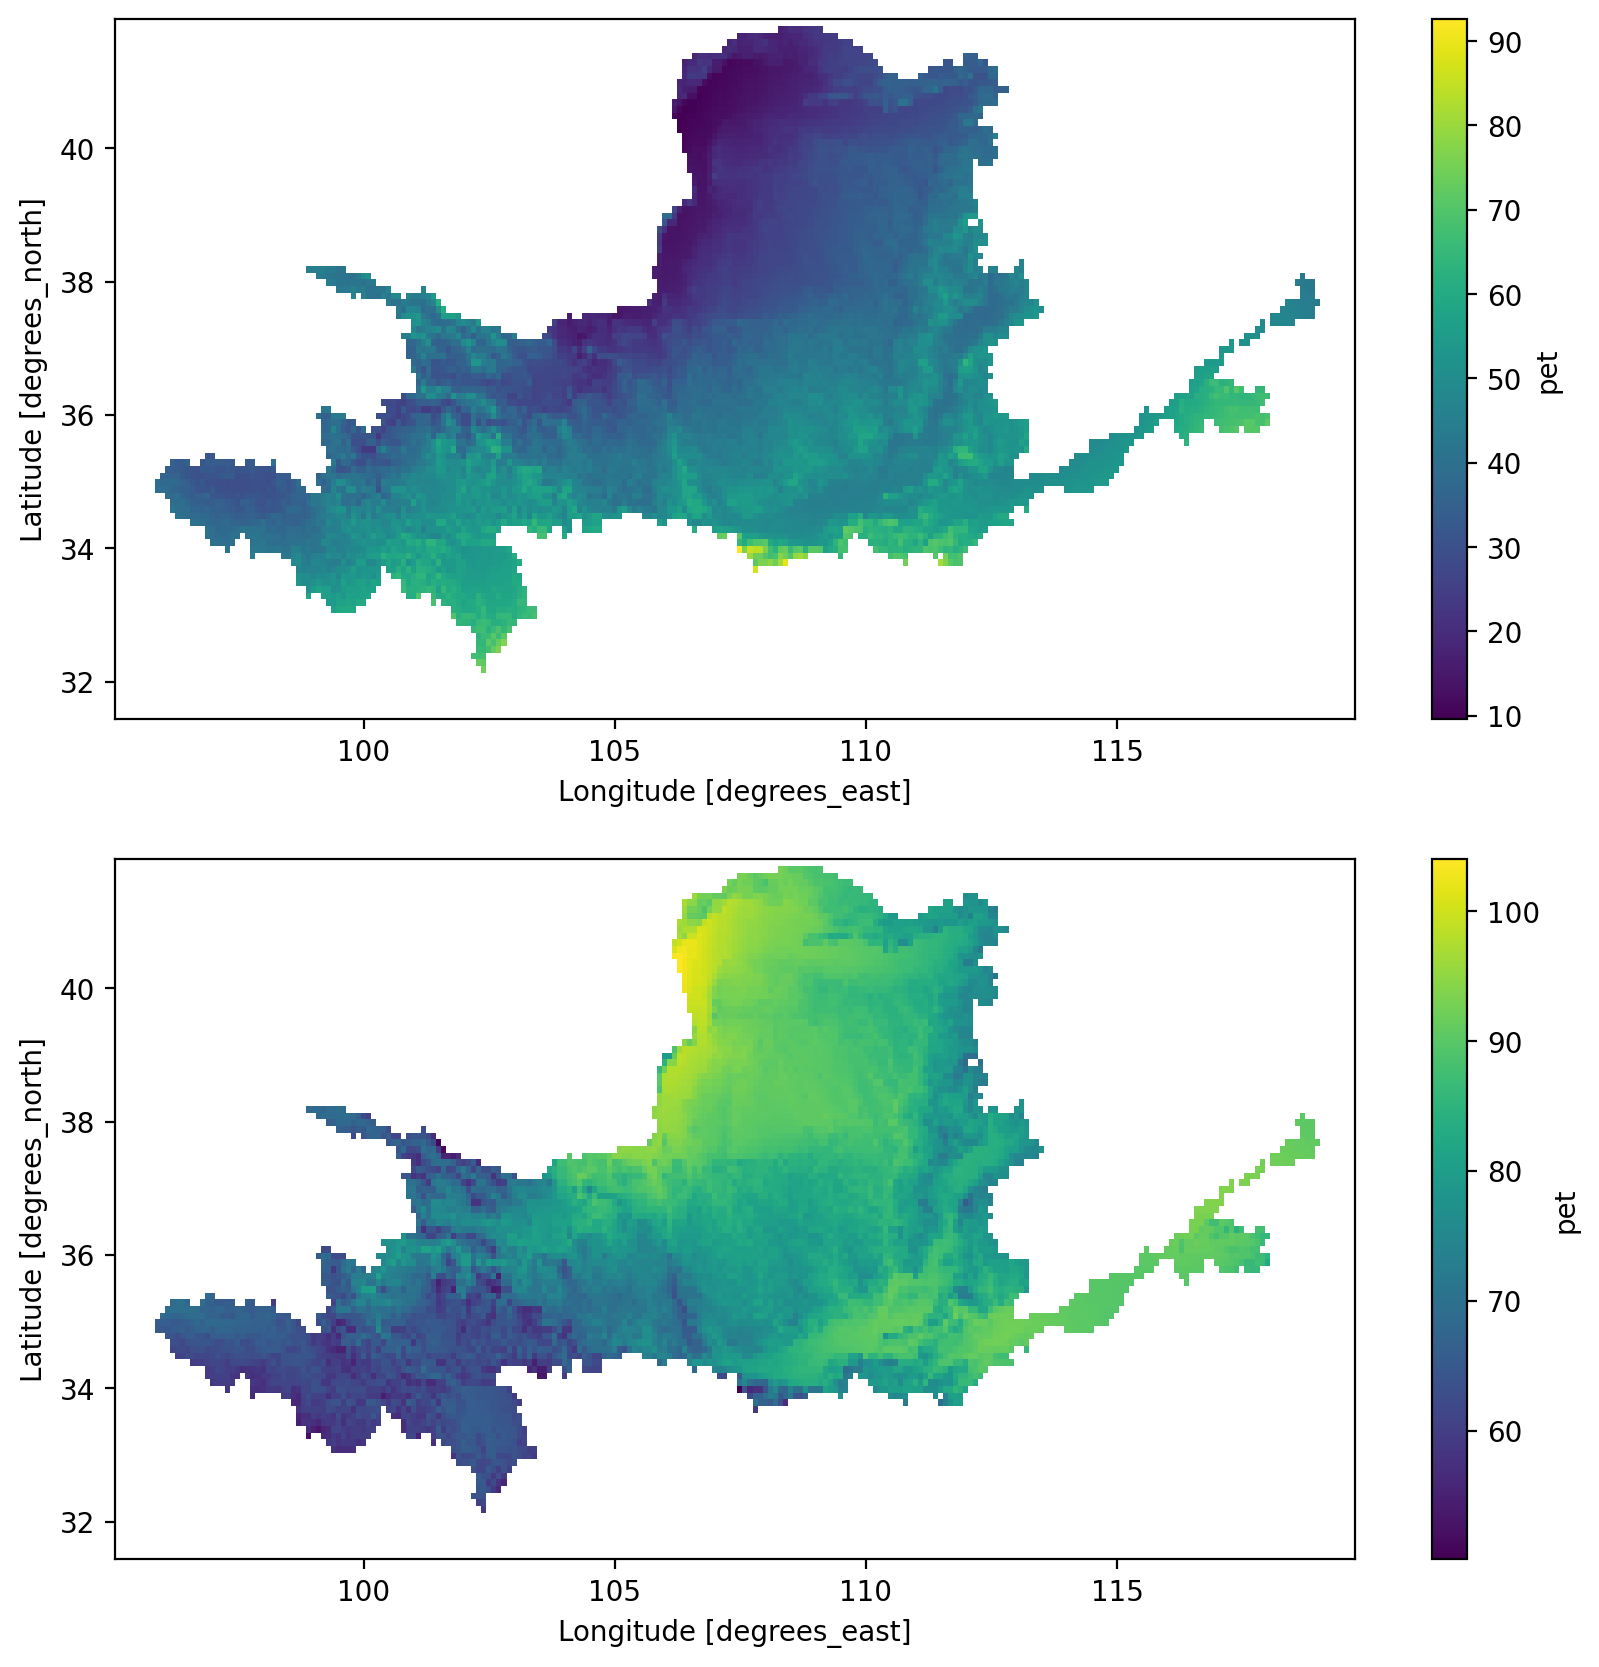

In [2]:
from past1000.api.io import check_data_dir
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

FOLDER = check_data_dir(cfg.ds.spei.folder)
pr = xr.open_dataarray(FOLDER / cfg.ds.spei.pr)
pr.data = np.flipud(pr.data)
pet = xr.open_dataarray(FOLDER / cfg.ds.spei.pet)
pet.data = np.flipud(pet.data)
_, ax = plt.subplots(2, 1, figsize=(10, 10))
pr.mean(dim="time").plot(ax=ax[0])
pet.mean(dim="time").plot(ax=ax[1])
plt.show();

## 计算 SPEI

使用 climate_indices 库计算 SPEI 干旱指数。

In [3]:
from past1000.ci.spei import calc_single_spei

spei = xr.apply_ufunc(
    calc_single_spei,
    pr,
    pet,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[["time"]],
    vectorize=True,
)

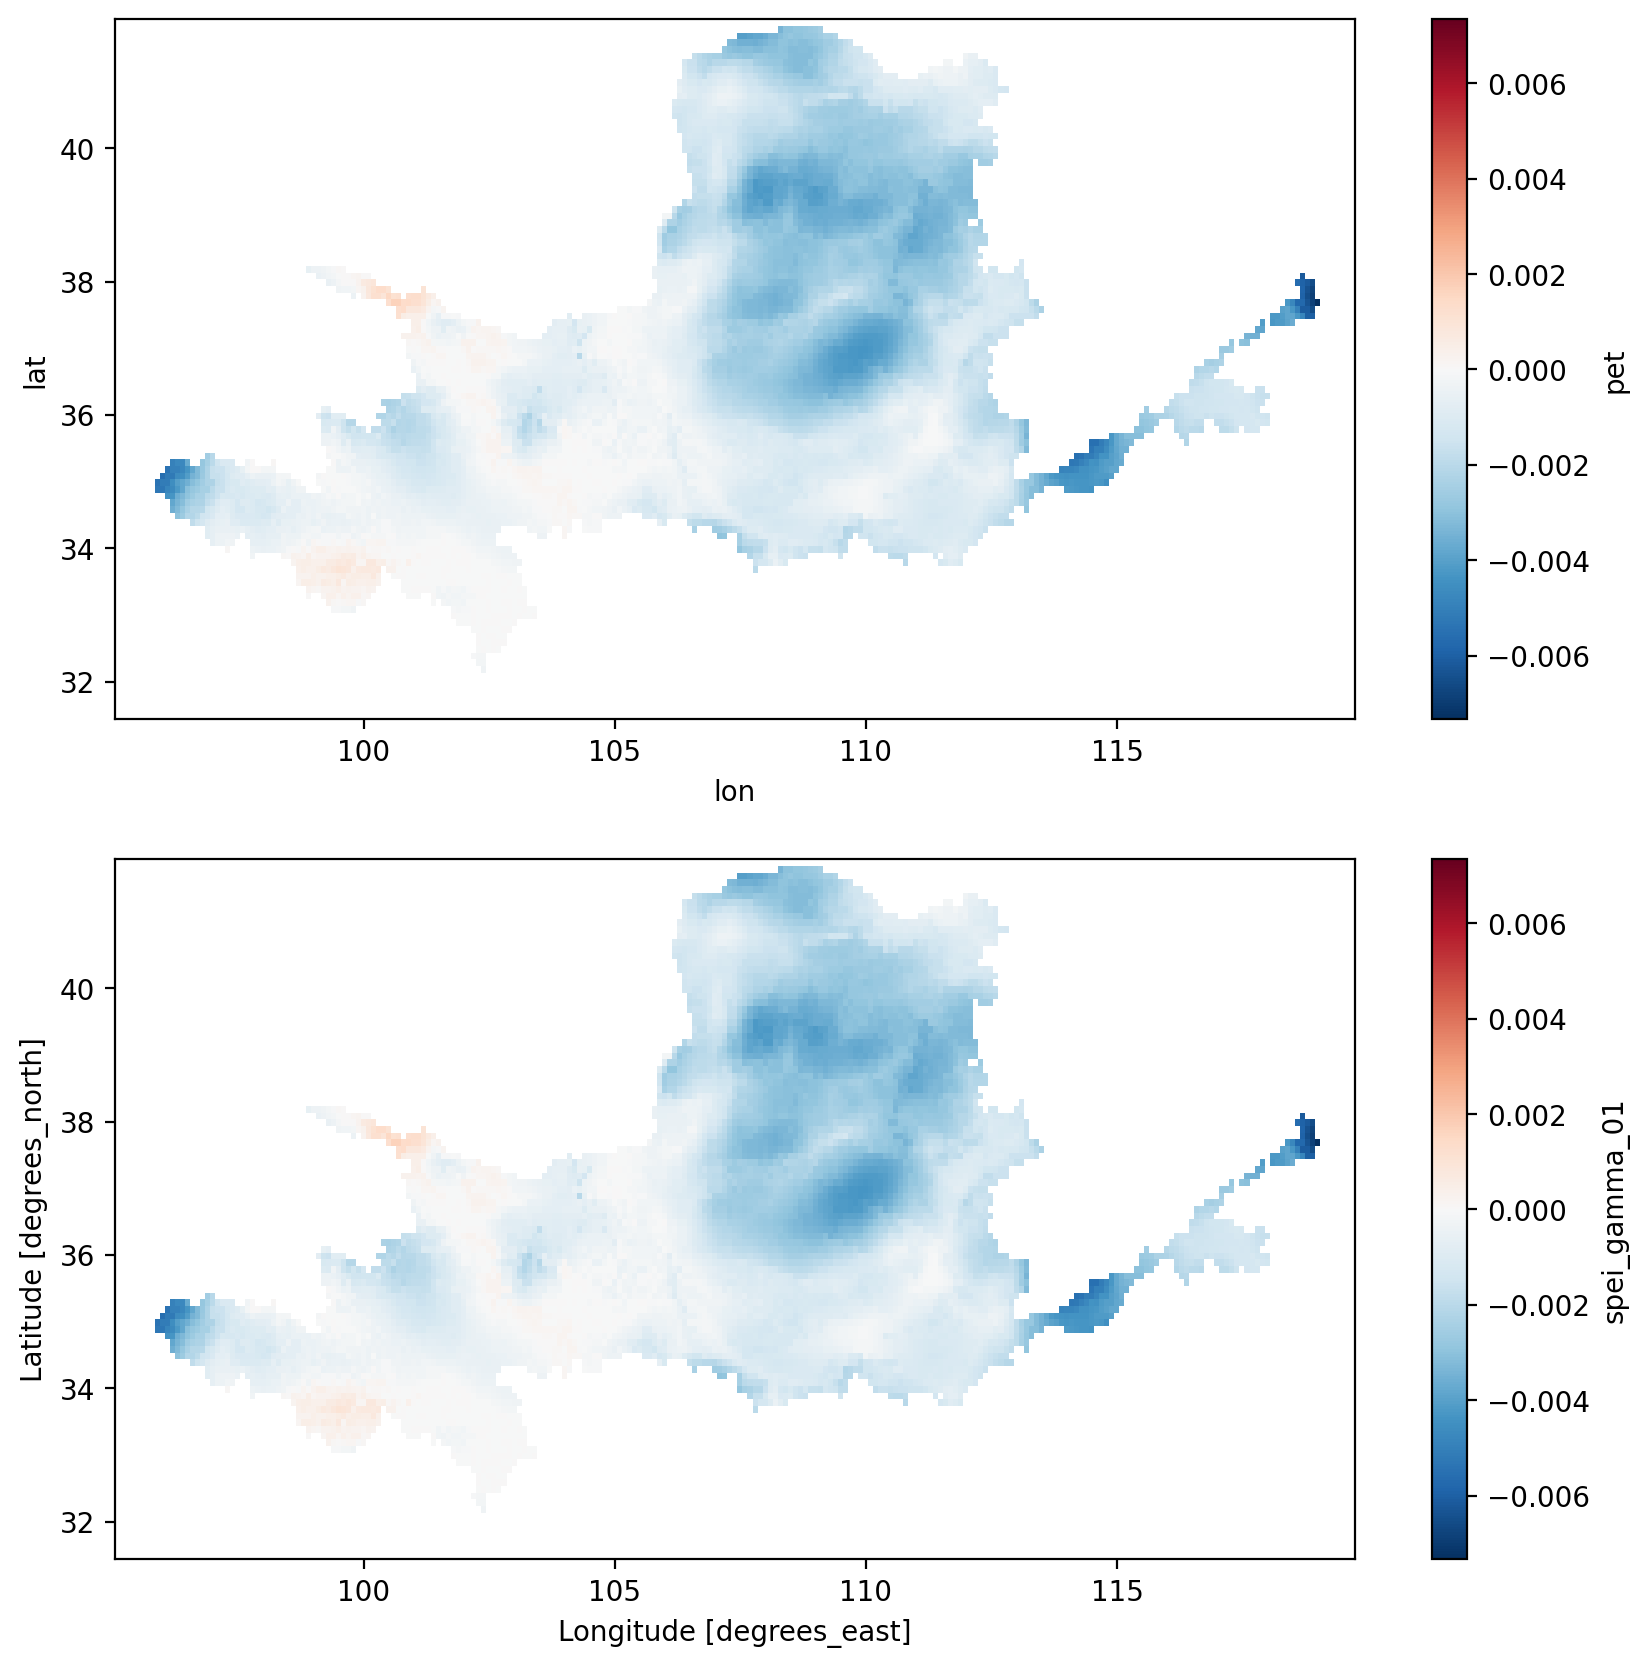

In [4]:
expected = xr.open_dataarray(
    FOLDER / cfg.ds.spei.pattern.format(dist="gamma", freq="01")
)
expected.data = np.flipud(expected.data)
_, ax = plt.subplots(2, 1, figsize=(10, 10))
spei.mean(dim="time").plot(ax=ax[0])
expected.mean(dim="time").plot(ax=ax[1])
plt.show();